# Integration mittels Monte-Carlo-Simulation

Erweiterung von Teil 1 um eine [Monte-Carlo-Simulation](https://mathepedia.de/Monte-Carlo-Methode.html). 

In [2]:
class Integration:
    def __init__(self, function):
        self.function = function

    def evalFunctionAt(self, x):
        return x

    def untersumme(self, start, end, n):
        sum = 0
        width = abs(start - end) / n
        for i in range(n):
            x = start + i * width
            sum += self.evalFunctionAt(x) * width
        return sum
    
    def obersumme(self, start, end, n):
        sum = 0
        width = abs(start - end) / n
        for i in range(1, n+1):
            x = start + i * width
            sum += self.evalFunctionAt(x) * width
        return sum
    
i = Integration("x^2")
print(i.obersumme(2, 5, 10))
print(i.untersumme(2, 5, 10))

10.95
10.049999999999999


### Ursprung der Monte-Carlo-Simulation
Die Monte-Carlo-Simulation wurde während des Manhatten-Projektes von John von Neumann und Stanislav Ulam entwickelt, ursprünglich um die Eigenschaften von Neutronenwanderung durch Strahlungsabschirmung zu untersuchen. Später kamen immer mehr Anwendungsgebiete hinzu.
Der Name rührt vom berühmten Kasion in Monaco, da beide (Mehtode und Kasino) randomisierte Zahlen und Zufallsstichproben benötigen. [1]

### Anwendung Monte-Carlo-Simulation
- Numerische Lösungen von Integralen (v.a. komplexe Integrale)
- Simulation von dynamischen Prozessen (Wetter, Produktionsabläufe)
- Simulation von Gleichgewischtszuständen (neuronale Netze)
- Statische Untersuchung vn Zufallsverteilungen (erhöhte Genauigkeit der Messfehler bei Experimenten durch häufiges simulieren des Experiments)

<p>MCS wird vor allem bei komplexen Aufgaben, die eigentlich eine hohe Rechenleistung erfordern verwendet</p> [2]

### Einfaches Anwendungsbeispiel: Buffonsches Nadelexperiment
Dieses Experiment dient der Bestimmung von $\pi$. In diesem Experiment werden viele Nadeln (damals Baguettes) geworfen und anschließend gezählt wie viele Nadeln eine Linie berühren und wieviele nicht. Die Wahrscheinlichkeit, dass eine Nadel die Linie kreuzt hängt, durch den Wurf, mit der Rotationssymmetrie der Nadelorientierung von $\pi$ zusammen. 
- $p = \frac{2l}{g\pi} \Rightarrow \pi=\frac{2l}{gp} $
- g ist Abstand der Linien, l ist Länge der Nadeln
[3]

![title](img/needles.gif) [4]

#### Hit-or-Miss Methode Funktionsprinzip:
- Generierung einer geometrischen Form (meist ein Rechteck) in welchem die Funktion integriert werden soll
- Generierung von zufälligen Punkten innerhalb dieser Form
- Zählen der Punkte die innerhalb der Funktion liegen (Treffer)
- Integral durch das Verhältnis von Treffern zu allen anderen Punkten und der Fläche des Rechtecks geschätzt [5]

#### Hit-or-Miss Methode Nachteile:
- Erfordert viele zufällige Punkte um eine angemessene Genauigkeit zu erzielen [5]


#### Direkte Methode Funktionsprinzip:
- Generierung von zufälligen Punkten innerhalb des Integrationsbereichs
- Berechnung des Funktionswertes an diesen Punkten
- Schätzung des Integrals durch die Summe der Funktionswerte und der mittleren Fläche aller Punkte [5]

### Mathematische Aspekte
- direkt $$\int_{a}^b f(x)\,dx \approx\,(b-a) \cdot \frac{1}{N} \sum_{i=1}^N f(x_i)$$ $$mit\,x_i \in [a,b]\,zufällig\,gezogen$$
- hit-or-miss $$A = RA \cdot (hits/all\,points)$$

In [9]:
import numpy as np
# Beispiel-Funktion
def f(x):
    return x**2  # Beispiel: f(x) = x^2

a, b = 0, 1  # Integrationsgrenzen
N = 10000    # Anzahl der Zufallspunkte

xRandom = np.random.uniform(a, b, N)
integralEstimate = (b - a) * np.mean(f(xRandom))
print(f"Monte-Carlo-Schätzwert des Integrals: {integralEstimate}")

Monte-Carlo-Schätzwert des Integrals: 0.33549393774845215


In [ ]:
import random
import math

class MCIntegration(Integration):
    def __init__(self, function):
        super().__init__(function)

    #estimatig bounds using "random" sampling
    def estimateBounds(self, start, end, samples=1000):
        xs = [random.uniform(start, end) for _ in range(samples)]
        ys = [self.evalFunctionAt(x) for x in xs]
        return min(ys), max(ys)

    def MCSHitOrMiss(self, start, end, numSamples=10000, fMinManual=None, fMaxManual=None):
        if start >= end:
            raise ValueError("start limit must be smaller than end limit")
        
        # defining limits of sampling-area
        if fMinManual is not None and fMaxManual is not None:
            fMin, fMax = fMinManual, fMaxManual
        else:
            fMin, fMax = self.estimateBounds(start, end)

        # defining rectangle
        rectYMin = min(0, fMin)
        rectYMax = max(0, fMax)
        rectArea = (end - start) * (rectYMax - rectYMin)

        hits = 0

        for _ in range(numSamples):
            x = random.uniform(start, end)
            y = random.uniform(rectYMin, rectYMax)
            f_x = self.evalFunctionAt(x)

            # check if dot is under/above the curve
            if f_x >= 0 and 0 <= y <= f_x:
                hits += 1
            elif f_x < 0 and f_x <= y <= 0:
                hits -= 1  # negativ unter x-Achse

        estimatedIntegral = (hits / numSamples) * rectArea
        return estimatedIntegral

f = lambda x: x**2
mc = MCIntegration(f)

# manual y-limits
resultManual = mc.MCSHitOrMiss(0, 1, numSamples=10000, fMinManual=0, fMaxManual=1)
print(f"manual: {resultManual: .7f}")

# explorative y-limits
resultAuto = mc.MCSHitOrMiss(0, 1, numSamples=10000)
print(f"explorative: {resultAuto: .7f}")

print("\n")

f2 = lambda x: x**3
mc2 = MCIntegration(f2)
resultManual2 = mc.MCSHitOrMiss(-1, 1, numSamples=100000, fMinManual=-1, fMaxManual=1)
print(f"manual: {resultManual2: .7f}")

resultAuto2 = mc.MCSHitOrMiss(-1,1, numSamples=100000)
print(f"explorative: {resultAuto2: .7f}")

print("\n")

f3 = lambda x: math.sin(1/x)
mc3 = MCIntegration(f3)
resultManual3 = mc.MCSHitOrMiss(0, math.pi, numSamples=100000, fMinManual=0, fMaxManual=math.pi)
print(f"manual: {resultManual3: .7f}")

resultAuto3 = mc.MCSHitOrMiss(0, math.pi, numSamples=100000)
print(f"explorative: {resultAuto3: .7f}")

print("\n")

f4 = lambda x: math.e**x
mc4 = MCIntegration(f4)

resultManual4 = mc.MCSHitOrMiss(0, 3, numSamples=100000, fMinManual=0, fMaxManual=150000)
print(f"manual: {resultManual3: .7f}")

resultAuto4 = mc.MCSHitOrMiss(0, 3, numSamples=100000)
print(f"explorative: {resultAuto4: .7f}")


manual:  0.4994000
explorative:  0.4914853


manual:  0.0100000
explorative: -0.0032358


manual:  4.9214782
explorative:  4.9291636


manual:  4.9214782
explorative:  4.5042901


# Quellen
<p><a href="https://homepage.univie.ac.at/franz.vesely/oslo_2005/neum_karch_web/sc/sim/sim.pdf">[1] https://homepage.univie.ac.at/franz.vesely/oslo_2005/neum_karch_web/sc/sim/sim.pdf </a>(p. 1, entnommen am 10.07)</p>
<p><a href="https://www.zeuthen.desy.de/~kolanosk/smd_ss08/skripte/mc.pdf">[2] https://www.zeuthen.desy.de/~kolanosk/smd_ss08/skripte/mc.pdf </a>(p. 1, entnommen am 10.07)</p>
<p><a href="https://imsc.uni-graz.at/baur/lehre/WS2013-Seminar/S15.pdf">[3] https://imsc.uni-graz.at/baur/lehre/WS2013-Seminar/S15.pdf </a>(p. 6, entnommen am 10.07)</p>
<p><a href="https://faculty.uml.edu/klevasseur/courses/m419/proj/buffon/buffon.html">[4] https://faculty.uml.edu/klevasseur/courses/m419/proj/buffon/buffon.html </a>(entnommen am 10.07)</p>
<p><a href="https://www.mathematik.tu-clausthal.de/interaktiv/integration/monte-carlo-integration">[5] https://www.mathematik.tu-clausthal.de/interaktiv/integration/monte-carlo-integration </a>(entnommen am 10.07)</p>


### Ursprung der Monte-Carlo-Simulation
- Entwicklung während des Manhatten-Projektes um die Eigenschaften von Neutronenwanderung durch Strahlungsabschirmung zu untersuchen
- Entwickelt von John von Neumann und Stanislav Ulam

### Anwendung Monte-Carlo-Simulation
- Zufallsprozesse (z.B. Diffusionsprozesse oder Risikosimulationen in der Finanzwirtschaft)
- Hochdimensionale Integrale, bei welchem klassische Prozesse zu langsam sind (z.B. Physik oder Quantenmechanik)

### Hit-or-miss oder die direkte MCS?
- Hit-or-miss $$mittlerer Funktionswert \times Intervalllänge$$
- Direkt $$Fläche\,über\,Punktverhältnis\,schätzen$$
test

### Nachteile
- Konvergiert sehr langsam: Ungefährer Fehler bei $$\frac{1}{\sqrt{N}}$$
- Die Schätzung ist mit großer Unsicherheit zu bewerten
- Reproduzierbarkeit nur bedingt gewährleistet (PRNGs daher unerlässlich)

Grundsätzlich gilt, dass analytische und experimentelle Lösungen bevorzugt werden sollten, da sie akurater sind.

### Mathematische Aspekte
- direkt $$\int_{a}^b f(x)\,dx \approx\,(b-a) \cdot \frac{1}{N} \sum_{i=1}^N f(x_i)$$ $$mit\,x_i \in [a,b]\,zufällig\,gezogen$$
- hit-or-miss $$A = RA \cdot (hits/all\,points)$$

In [9]:
import numpy as np
# Beispiel-Funktion
def f(x):
    return x**2  # Beispiel: f(x) = x^2

a, b = 0, 1  # Integrationsgrenzen
N = 10000    # Anzahl der Zufallspunkte

xRandom = np.random.uniform(a, b, N)
integralEstimate = (b - a) * np.mean(f(xRandom))
print(f"Monte-Carlo-Schätzwert des Integrals: {integralEstimate}")

Monte-Carlo-Schätzwert des Integrals: 0.33549393774845215


# Quellen
Aus Zotero importieren.


### Münzwurfbeispiel

Final Value:  0.496


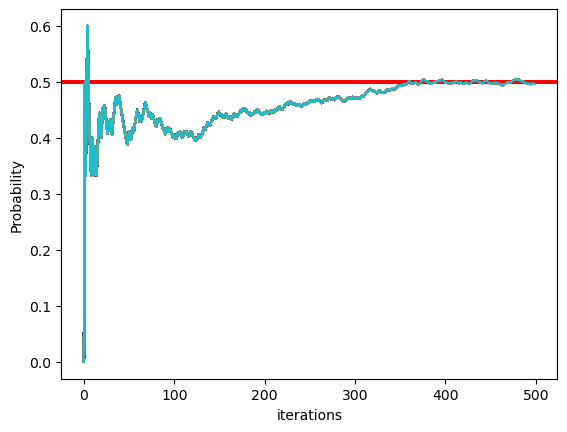

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

#Kopf(0), Zahl(1)
def coinFlip():
    return random.randint(0,1)
#Value der Funktion, 0 oder 1 wird returnt
coinFlip()

#MCS
list = []

def MCS(n):
    results = 0
    for i in range(n):
        flipResult = coinFlip()
        results = results + flipResult

        probValue = results/(i+1)
        list.append(probValue)

        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("iterations")
        plt.ylabel("Probability")
        plt.plot(list)
    return results/n

print("Final Value: ", MCS(500))

### Pi annähern mithilfe von Kries und Quadrat

In [5]:
import turtle
import random
import math
import matplotlib.pyplot as plt

#Visualisierung von randomisierten Punkten
myPen = turtle.Turtle()
myPen.hideturtle()
myPen.speed(0)

#Zeichnen des Quadrats
myPen.up()
myPen.setposition(-100,100)
myPen.down()
myPen.fd(200)
myPen.left(90)
myPen.fd(200)

myPen.left(90)
myPen.fd(200)
myPen.left(90)
myPen.fd(200)
myPen.left(90)

#Zeichnen des Kreises
myPen.up()
myPen.setposition(0,-100)
myPen.down()
myPen.circle(100)

inCircle = 0
outCircle = 0

piValues = []

for i in range(5):
    for j in range(1000):
        x = random.randrange(-100,100)
        y = random.randrange(-100,100)

        if(x**2+y**2 > 100**2):
            myPen.color("black")
            myPen.up()
            myPen.goto(x,y)
            myPen.down()
            myPen.dot()
            outCircle = outCircle+1

        else:
            myPen.color("red")
            myPen.up()
            myPen.goto(x,y)
            myPen.down()
            myPen.dot()
            inCircle = inCircle +1

        pi = 4.0 * inCircle / (inCircle + outCircle)

        piValues.append(pi)

        avgPiErrors = [abs(math.pi - pi) for pi in piValues]
    print(piValues[-1])


#Data plotten
plt.axhline(y=math.pi, color='g', linestyle='y')
plt.plot(piValues)
plt.xlabel("Iterations")
plt.ylabel("Value of Pi")
plt.show()

#Error calculation
plt.axhline(y=0.0, color='g', linestyle='y')
plt.plot(avgPiErrors)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()



KeyboardInterrupt



### Wie Kasinos Geld verdienen

[9200, 9800, 9800, 9000, 9200, 8600, 10600, 9000, 9600, 9800, 10400, 10400, 9600, 11000, 8600, 9800, 11000, 8600, 10400, 10200, 9600, 10400, 10000, 9000, 10000, 9600, 9200, 9800, 10800, 9600, 11600, 9400, 10600, 9600, 9200, 10400, 9600, 10400, 10400, 10400, 9000, 10000, 9600, 10400, 10800, 11800, 9400, 9200, 11400, 8800, 11400, 9800, 10000, 9800, 9800, 10800, 10400, 10000, 9600, 10200, 8800, 9400, 9600, 10600, 9400, 9800, 8800, 10800, 9800, 9400, 10200, 10000, 10400, 11000, 9200, 10000, 11000, 10800, 10200, 9600, 9400, 8600, 10200, 10000, 9400, 10600, 10000, 9200, 10000, 10200, 9800, 9400, 9800, 10000, 8800, 9200, 10000, 11000, 10000, 10200]
991000
Player started with 10.000€
Player left with  9910.0  €


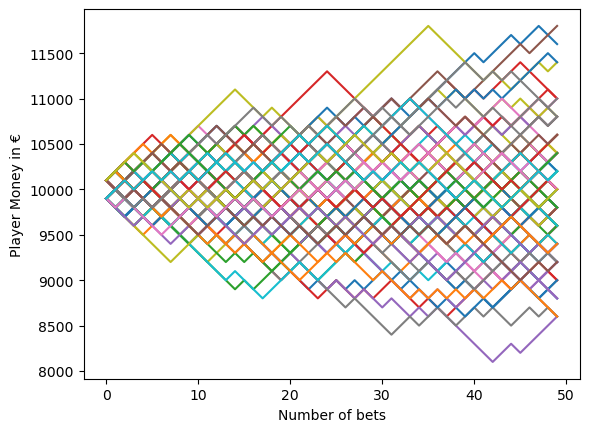

In [10]:
import random
import matplotlib.pyplot as plt

choice = input("Do you want to bet an even or an odd number?\n")

#For even:
if choice == "Even":
    def pickNote():
        note = random.randint(1,100)
        if note%2 != 0 or note == 10:
            return False
        elif note%2 == 0:
            return True
elif choice == "odd":
    def pickNote():
        note = random.randint(1,100)
        if note%2 == 0 or note == 11:
            return False
        elif note%2 == 1:
            return True

def play(totalMoney, betMoney, totalPlays):
    numOfPlays = []
    money = []

    play = 1
    for play in range(totalPlays):
        if pickNote():
            totalMoney = totalMoney + betMoney
            numOfPlays.append(play)
            money.append(totalMoney)

        else:
            totalMoney = totalMoney - betMoney
            numOfPlays.append(play)
            money.append(totalMoney)

    plt.xlabel('Number of bets')
    plt.ylabel('Player Money in €')
    plt.plot(numOfPlays, money)

    finalFunds.append(money[-1])
    return(finalFunds)

finalFunds = []
for i in range(100):
    endingFund = play(10000,100,50)

print(endingFund)
print(sum(endingFund))

print("Player started with 10.000€")
print("Player left with ", str(sum(endingFund)/len(endingFund))," €")
